In [2]:
import numpy as np
data = np.load(r"F:\New folder\datasets\mnist.npz")
print(data.files)

['x_test', 'x_train', 'y_train', 'y_test']


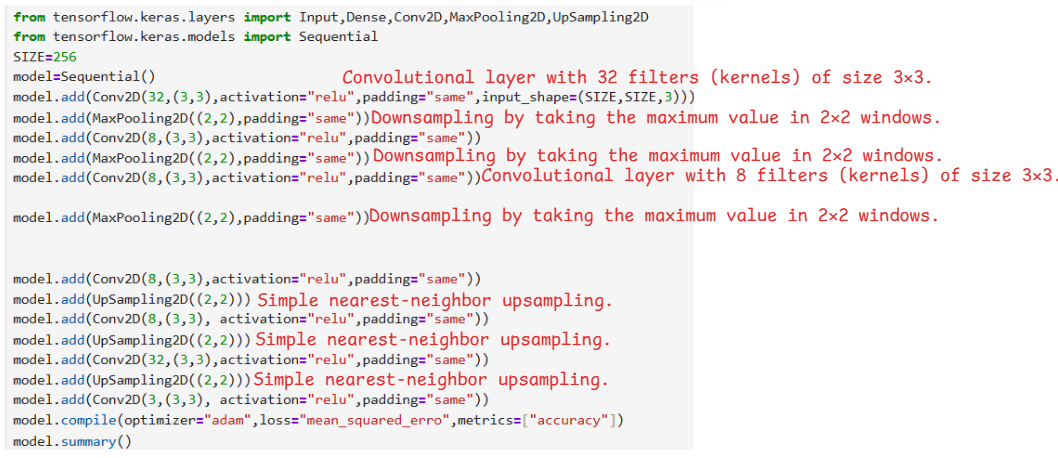

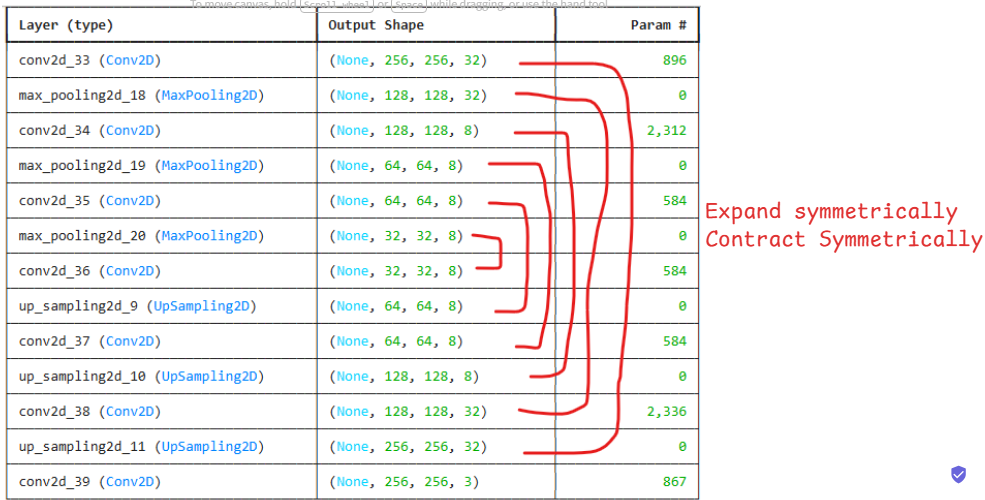

In [90]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
import cv2
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Input,Dense,Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras.models import Sequential
# Using Sequential method  to define architecture  where we can keep adding layers and dont have to worry about supplying the ouput from 
# previous layer:  
# model.add(Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(SIZE,SIZE,3)))
# as input input to the 
#next layer: 
#model.add(MaxPooling2D((2,2),padding="same"))
np.random.seed(42)
SIZE=256
img_data=[]
# importing image as color image
# 1:COLOR IMAGE
#0:GRAY SCALE IMAGE
# img becomes a NumPy array
img=cv2.imread("F:/New folder/Mona_Lisa.jpg",1)
print("shape of read image(Shape: (height, width, 3))",img.shape)

shape of read image(Shape: (height, width, 3)) (387, 256, 3)


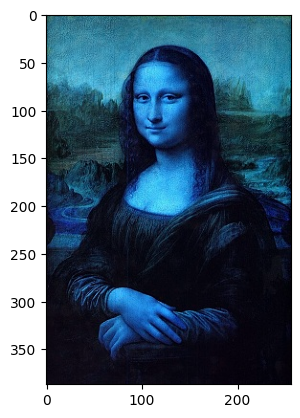

In [91]:
# Open cv imports images as BGR not RGB
# plt.imshow() → Matplotlib function
# Takes a NumPy array as input
# Displays the array as an image
plt.imshow(img)

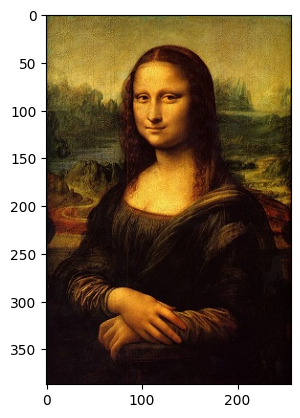

In [92]:
# cv2.cvtColor(source, conversion_code)
# img → input image
# cv2.COLOR_BGR2RGB → predefined OpenCV constant
# CONVERTING BGR to RGB
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

(-0.5, 255.5, 255.5, -0.5)

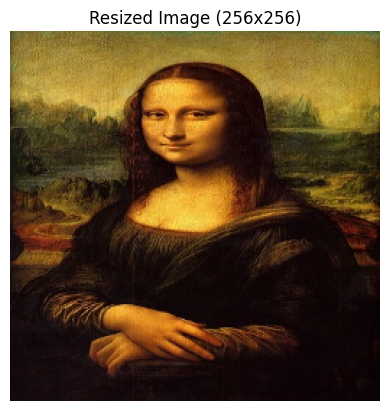

In [93]:
# RESIZING the image to 256x256
# cv2.resize() → OpenCV resize function
# First argument → image to resize
# Second argument → tuple (width, height)
# (SIZE, SIZE) → Python tuple
img = cv2.resize(img, (SIZE, SIZE))
plt.imshow(img)
plt.title("Resized Image (256x256)")
plt.axis("off")

In [94]:
# img_to_array(img) → converts image to NumPy array
# Ensures shape: (height, width, channels)
# Data type becomes float32
# .append() → list method
# Adds one image array to img_data
# CONVERTING IMAGE TO ARRAY and adding to image_data array
img_data.append(img_to_array(img))

In [95]:
# Reshaping the image
image_array=np.reshape(img_data,(len(img_data),SIZE,SIZE,3))
print("Shape of input image",image_array.shape)

Shape of input image (1, 256, 256, 3)


In [96]:
# UNORMALIZED IMAGE
print("input image array",image_array)

input image array [[[[ 77.  76.  29.]
   [ 92.  92.  44.]
   [ 95.  97.  47.]
   ...
   [ 71.  99.  50.]
   [ 73. 102.  51.]
   [ 66.  96.  45.]]

  [[ 85.  85.  41.]
   [ 85.  88.  40.]
   [102. 106.  56.]
   ...
   [ 90. 113.  58.]
   [ 77. 100.  45.]
   [102. 124.  68.]]

  [[ 86.  89.  44.]
   [ 91.  95.  50.]
   [ 94.  97.  50.]
   ...
   [111. 123.  63.]
   [ 94. 105.  45.]
   [105. 116.  57.]]

  ...

  [[ 18.   7.  11.]
   [ 17.   5.   9.]
   [ 19.   8.  12.]
   ...
   [ 11.   2.   5.]
   [ 11.   2.   5.]
   [  9.   0.   3.]]

  [[ 20.  11.  12.]
   [ 18.   9.  10.]
   [ 23.  14.  17.]
   ...
   [  8.   0.   0.]
   [ 13.   4.   5.]
   [  9.   0.   1.]]

  [[ 22.  13.  14.]
   [ 20.  11.  12.]
   [ 25.  16.  19.]
   ...
   [  8.   0.   0.]
   [ 14.   5.   6.]
   [ 10.   1.   2.]]]]


In [97]:
# NORMALIZING the IMAGE
image_array=image_array.astype("float32")/255.
print("NORMALIZED IMAGE ARRAY\n",image_array)
print("shape of NORMALIZED IMAGE ARRAY\n",image_array.shape)

NORMALIZED IMAGE ARRAY
 [[[[0.3019608  0.29803923 0.11372549]
   [0.36078432 0.36078432 0.17254902]
   [0.37254903 0.38039216 0.18431373]
   ...
   [0.2784314  0.3882353  0.19607843]
   [0.28627452 0.4        0.2       ]
   [0.25882354 0.3764706  0.1764706 ]]

  [[0.33333334 0.33333334 0.16078432]
   [0.33333334 0.34509805 0.15686275]
   [0.4        0.41568628 0.21960784]
   ...
   [0.3529412  0.44313726 0.22745098]
   [0.3019608  0.39215687 0.1764706 ]
   [0.4        0.4862745  0.26666668]]

  [[0.3372549  0.34901962 0.17254902]
   [0.35686275 0.37254903 0.19607843]
   [0.36862746 0.38039216 0.19607843]
   ...
   [0.43529412 0.48235294 0.24705882]
   [0.36862746 0.4117647  0.1764706 ]
   [0.4117647  0.45490196 0.22352941]]

  ...

  [[0.07058824 0.02745098 0.04313726]
   [0.06666667 0.01960784 0.03529412]
   [0.07450981 0.03137255 0.04705882]
   ...
   [0.04313726 0.00784314 0.01960784]
   [0.04313726 0.00784314 0.01960784]
   [0.03529412 0.         0.01176471]]

  [[0.07843138 0.0431

In [ ]:

model=Sequential()
# ENCODING LAYERS:
# First the input image fed to the network the image is (256,256,3) form array
model.add(Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(SIZE,SIZE,3)))
model.add(MaxPooling2D((2,2),padding="same"))
model.add(Conv2D(8,(3,3),activation="relu",padding="same"))
model.add(MaxPooling2D((2,2),padding="same"))
model.add(Conv2D(8,(3,3),activation="relu",padding="same"))
# LATENT LAYER/LATENT SPACE:
model.add(MaxPooling2D((2,2),padding="same"))
# DECODING LAYERS:
model.add(Conv2D(8,(3,3),activation="relu",padding="same"))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(8,(3,3), activation="relu",padding="same"))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(3,(3,3), activation="relu",padding="same"))
model.compile(optimizer="adam",loss="mean_squared_error",metrics=["accuracy"])
model.summary()
model.fit(image_array,image_array,epochs=500,shuffle=True)
pred=model.predict(image_array)
imshow(pred[0].reshape(SIZE,SIZE,3))          

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_138 (Conv2D)                  │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_63 (MaxPooling2D)      │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_139 (Conv2D)                  │ (None, 128, 128, 8)         │           2,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_64 (MaxPooling2D)      │ (None, 64, 64, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_140 (Conv2D)                  │ (None, 64, 64, 8)           │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_65 (MaxPooling2D)      │ (None, 32, 32, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_141 (Conv2D)                  │ (None, 32, 32, 8)           │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_54 (UpSampling2D)      │ (None, 64, 64, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_142 (Conv2D)                  │ (None, 64, 64, 8)           │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_55 (UpSampling2D)      │ (None, 128, 128, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_143 (Conv2D)                  │ (None, 128, 128, 32)        │           2,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_56 (UpSampling2D)      │ (None, 256, 256, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_144 (Conv2D)                  │ (None, 256, 256, 3)         │             867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,163 (31.89 KB)

 Trainable params: 8,163 (31.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.9626 - loss: 0.0674
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.9895 - loss: 0.0471
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.9930 - loss: 0.0309
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.9941 - loss: 0.0240
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.9937 - loss: 0.0242
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.9845 - loss: 0.0202
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.9664 - loss: 0.0153
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.8844 - loss: 0.0140
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.7464 - loss: 0.0157
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.6452 - loss: 0.0176
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.6365 - loss: 0.0182
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.